In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

In [30]:
data = pd.read_csv("../data/subset_dataset_frunza_roxana.csv")

In [31]:
data.head()

,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,SalePrice
0,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,145000
1,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,178000
2,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,NaN,0.0,85000
3,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,175000
4,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,127000


In [32]:
selected_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd']

In [33]:
x = data[selected_features]
y = data["SalePrice"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


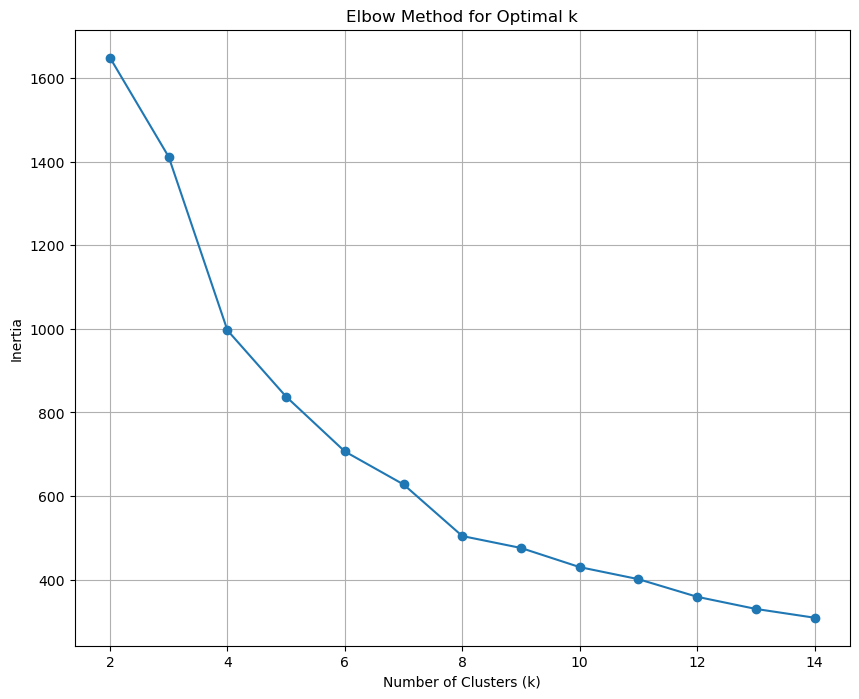

In [34]:
inertia = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


    The Elbow Method plot shows a clear inflection around k = 4–6, suggesting this as an optimal range for cluster count

In [35]:
kmeans = KMeans(n_clusters=10, random_state=42)
data["Cluster"] = kmeans.fit_predict(x_scaled)

In [36]:
kmeans_summary = data.groupby("Cluster")["SalePrice"].agg(["mean", "median", "std", "count"])
print(kmeans_summary)

                  mean    median           std  count
Cluster                                              
0        201500.042705  194500.0  40227.839817    281
1        164820.190476  159500.0  44443.557939    105
2        121583.756098  115000.0  33623.539276     41
3         91477.551020   93000.0  25684.928016     49
4        303742.965318  285000.0  88250.499122    173
5        150814.500000  144950.0  35202.765147    100
6        130526.705263  122000.0  38156.844081     95
7        129769.581250  129250.0  26239.091934    160
8        161039.064815  155500.0  30972.217259    108
9        184721.125000  162000.0  77915.591189     56


In [37]:
feature_means = data.groupby("Cluster")[x.columns].mean()
feature_means

,OverallQual,YearBuilt,YearRemodAdd
Cluster,,,
0,6.693950,2000.138790,2001.715302
1,6.228571,1966.323810,1967.019048
2,4.658537,1914.585366,1998.780488
3,3.612245,1932.265306,1951.346939
4,8.335260,2002.161850,2003.219653
5,5.060000,1960.420000,2000.810000
6,5.694737,1926.673684,1950.578947
7,4.793750,1961.343750,1962.312500
8,5.694444,1978.731481,1982.944444


In [38]:
fig = px.scatter(
    data,
    x="OverallQual",
    y="YearBuilt",
    color="Cluster",
    size="SalePrice",
    title="Clusters by OverallQual and YearBuilt"
)
fig.show()


In [39]:
fig = px.scatter(
    data,
    x="YearRemodAdd",
    y="OverallQual",
    color="Cluster",
    size="SalePrice",
    title="Clusters by YearRemodAdd and OverallQual"
)
fig.show()


In [40]:
fig = px.scatter(
    data,
    x="YearRemodAdd",
    y="YearBuilt",
    color="Cluster",
    size="SalePrice",
    title="Clusters by YearRemodAdd and YearBuilt"
)
fig.show()


In [41]:
fig_box = px.box(
    data,
    x="Cluster",
    y="SalePrice",
    color="Cluster",
    title="SalePrice distribution across clusters"
)
fig_box.show()

    The K-Means algorithm managed to group houses by similar characteristics that also align with their sale prices, even without using SalePrice during training.

    Higher-quality and newer houses (Cluster 4) formed high-price groups.Older or lower-quality houses (Clusters 2 and 3) had the lowest prices
    
    Mid-range clusters contained average-quality, moderately priced homes
